# Load Data from CSV file

사용된 dataset : https://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
print(plt.style.available)

# i picked 'seaborn-v0_8-whitegrid'
plt.style.use('seaborn-whitegrid')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
%pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import chardet

# '서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv' 파일의 인코딩 방식을 알아내기
with open('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


# Understanding the Data

In [5]:
# read the data (with the encoding)
df = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding=result['encoding'])
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202410,1호선,동대문,634,22,12458,1990,10170,7253,16816,...,9969,771,2838,4,231,0,0,0,0,20241103
1,202410,1호선,동묘앞,223,4,3169,1026,3758,5319,9258,...,4882,106,1831,0,263,0,0,0,0,20241103
2,202410,1호선,서울역,573,9,8623,9367,14928,61884,42711,...,13969,2848,3802,1,207,0,0,0,0,20241103
3,202410,1호선,시청,84,1,2078,5753,4249,30299,8265,...,3775,506,979,1,41,0,0,0,0,20241103
4,202410,1호선,신설동,384,22,9813,2340,10345,10232,22756,...,9779,375,2781,0,1,0,1,0,0,20241103


In [6]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69931 entries, 0 to 69930
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           69931 non-null  int64 
 1   호선명           69931 non-null  object
 2   지하철역          69931 non-null  object
 3   04시-05시 승차인원  69931 non-null  int64 
 4   04시-05시 하차인원  69931 non-null  int64 
 5   05시-06시 승차인원  69931 non-null  int64 
 6   05시-06시 하차인원  69931 non-null  int64 
 7   06시-07시 승차인원  69931 non-null  int64 
 8   06시-07시 하차인원  69931 non-null  int64 
 9   07시-08시 승차인원  69931 non-null  int64 
 10  07시-08시 하차인원  69931 non-null  int64 
 11  08시-09시 승차인원  69931 non-null  int64 
 12  08시-09시 하차인원  69931 non-null  int64 
 13  09시-10시 승차인원  69931 non-null  int64 
 14  09시-10시 하차인원  69931 non-null  int64 
 15  10시-11시 승차인원  69931 non-null  int64 
 16  10시-11시 하차인원  69931 non-null  int64 
 17  11시-12시 승차인원  69931 non-null  int64 
 18  11시-12시 하차인원  69931 non-null  int64 
 19  12시-

In [7]:
# check the unique values of '호선명'
print(f"총 {df['호선명'].nunique()}개의 호선이 있습니다.")
print(df['호선명'].unique())

# check the unique values of '지하철역'
print(f"총 {df['지하철역'].nunique()}개의 지하철역이 있습니다.")
print(df['지하철역'].unique())

총 28개의 호선이 있습니다.
['1호선' '2호선' '3호선' '4호선' '5호선' '6호선' '7호선' '8호선' '9호선' '9호선2~3단계' '경강선'
 '경부선' '경원선' '경의선' '경인선' '경춘선' '공항철도 1호선' '과천선' '분당선' '서해선' '수인선' '신림선'
 '안산선' '우이신설선' '일산선' '장항선' '중앙선' '9호선2단계']
총 598개의 지하철역이 있습니다.
['동대문' '동묘앞' '서울역' '시청' '신설동' '제기동' '종각' '종로3가' '종로5가' '청량리(서울시립대입구)' '강남'
 '강변(동서울터미널)' '건대입구' '교대(법원.검찰청)' '구로디지털단지' '구의(광진구청)' '낙성대(강감찬)' '당산'
 '대림(구로구청)' '도림천' '동대문역사문화공원(DDP)' '뚝섬' '문래' '방배' '봉천' '사당' '삼성(무역센터)'
 '상왕십리' '서울대입구(관악구청)' '서초' '선릉' '성수' '신답' '신당' '신대방' '신도림' '신림' '신정네거리'
 '신촌' '아현' '양천구청' '역삼' '영등포구청' '왕십리(성동구청)' '용답' '용두(동대문구청)' '을지로3가'
 '을지로4가' '을지로입구' '이대' '잠실(송파구청)' '잠실나루' '잠실새내' '종합운동장' '충정로(경기대입구)' '한양대'
 '합정' '홍대입구' '가락시장' '경복궁(정부서울청사)' '경찰병원' '고속터미널' '구파발' '금호' '남부터미널(예술의전당)'
 '녹번' '대청' '대치' '도곡' '독립문' '동대입구' '매봉' '무악재' '불광' '수서' '신사' '안국' '압구정'
 '약수' '양재(서초구청)' '연신내' '오금' '옥수' '일원' '잠원' '지축' '충무로' '학여울' '홍제' '길음'
 '남태령' '노원' '당고개' '동작(현충원)' '명동' '미아(서울사이버대학)' '미아사거리' '삼각지' '상계'
 '성신여대입구(돈암)' '수유(강북구청)' '숙대입구(갈월)' '신용산' '쌍문' '이촌(국립중앙박물관)' '창

# Data Preprocessing

1. ~역
* 어떤 지하철역명은 ~역으로 표기되어있지만, 다른 지하철역명은 ~역으로 표기되어있지 않다. 
* 이를 통일시키기 위해 역명을 통일시킨다.
* 모두 ~역으로 표기되도록 하기 위해 역명 뒤에 '역'을 붙여준다.

2. 01시 -> 1시

## 1. ~역

In [8]:
# before preprocessing
print(df['지하철역'])

0        동대문
1        동묘앞
2        서울역
3         시청
4        신설동
        ... 
69926    운길산
69927     원덕
69928     중랑
69929     팔당
69930     회기
Name: 지하철역, Length: 69931, dtype: object


In [9]:
# preprecessing
df['지하철역'] = df['지하철역'].str.replace('역', '') # remove '역' from the '지하철역' column
df['지하철역'] = df['지하철역'] + '역' # add '역' to the '지하철역' column

In [10]:
# after preprocessing
print(df['지하철역'])

0        동대문역
1        동묘앞역
2         서울역
3         시청역
4        신설동역
         ... 
69926    운길산역
69927     원덕역
69928     중랑역
69929     팔당역
69930     회기역
Name: 지하철역, Length: 69931, dtype: object


## 2. 01시 -> 1시

In [11]:
# before preprocessing
# column '04시-05시 승차인원' to '4시-5시 승차인원'
print(df.columns)

Index(['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원',
       '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원',
       '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원',
       '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원',
       '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원',
       '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원',
       '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원',
       '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원',
       '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원',
       '03시-04시 하차인원', '작업일자'],
      dtype='object')


In [12]:
# preprocessing

df.columns = df.columns.str.replace('00시-01시 승차인원', '0시-1시 승차인원')
df.columns = df.columns.str.replace('01시-02시 승차인원', '1시-2시 승차인원')
df.columns = df.columns.str.replace('02시-03시 승차인원', '2시-3시 승차인원')
df.columns = df.columns.str.replace('03시-04시 승차인원', '3시-4시 승차인원')
df.columns = df.columns.str.replace('04시-05시 승차인원', '4시-5시 승차인원')
df.columns = df.columns.str.replace('05시-06시 승차인원', '5시-6시 승차인원')
df.columns = df.columns.str.replace('06시-07시 승차인원', '6시-7시 승차인원')
df.columns = df.columns.str.replace('07시-08시 승차인원', '7시-8시 승차인원')
df.columns = df.columns.str.replace('08시-09시 승차인원', '8시-9시 승차인원')
df.columns = df.columns.str.replace('09시-10시 승차인원', '9시-10시 승차인원')


df.columns = df.columns.str.replace('00시-01시 하차인원', '0시-1시 하차인원')
df.columns = df.columns.str.replace('01시-02시 하차인원', '1시-2시 하차인원')
df.columns = df.columns.str.replace('02시-03시 하차인원', '2시-3시 하차인원')
df.columns = df.columns.str.replace('03시-04시 하차인원', '3시-4시 하차인원')
df.columns = df.columns.str.replace('04시-05시 하차인원', '4시-5시 하차인원')
df.columns = df.columns.str.replace('05시-06시 하차인원', '5시-6시 하차인원')
df.columns = df.columns.str.replace('06시-07시 하차인원', '6시-7시 하차인원')
df.columns = df.columns.str.replace('07시-08시 하차인원', '7시-8시 하차인원')
df.columns = df.columns.str.replace('08시-09시 하차인원', '8시-9시 하차인원')
df.columns = df.columns.str.replace('09시-10시 하차인원', '9시-10시 하차인원')

# after preprocessing
print(df.columns)

Index(['사용월', '호선명', '지하철역', '4시-5시 승차인원', '4시-5시 하차인원', '5시-6시 승차인원',
       '5시-6시 하차인원', '6시-7시 승차인원', '6시-7시 하차인원', '7시-8시 승차인원', '7시-8시 하차인원',
       '8시-9시 승차인원', '8시-9시 하차인원', '9시-10시 승차인원', '9시-10시 하차인원',
       '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원', '11시-12시 하차인원',
       '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원', '13시-14시 하차인원',
       '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원', '15시-16시 하차인원',
       '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원', '17시-18시 하차인원',
       '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원', '19시-20시 하차인원',
       '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원', '21시-22시 하차인원',
       '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원', '23시-24시 하차인원',
       '0시-1시 승차인원', '0시-1시 하차인원', '1시-2시 승차인원', '1시-2시 하차인원', '2시-3시 승차인원',
       '2시-3시 하차인원', '3시-4시 승차인원', '3시-4시 하차인원', '작업일자'],
      dtype='object')


# Make Function to plot the custom input data

* input : 
  * line='호선명'(필수X), 
  * station='역명'(필수), 
  * eta='예상도착시간'(필수)
* output : 
  * 해당 line, station, eta에 대한 평균, 최대, 최소 승차인원과 하차인원

In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [18]:
import platform
import matplotlib as mpl
from matplotlib import rc
import seaborn as sns
    
def preprocess_eta(eta) :
    # 08시 -> 08시-09시
    # 24시 -> 00시-01시
    # 00시 -> 00시-01시
    if eta == '24시' :
        eta = '0시'
    eta = eta + '-' + str(int(eta.split('시')[0])+1) + '시'
    return eta

def get_aggregation_getonoff(line=None, station=None, eta=None) :
    '''
    input :
        line : str, default None (호선명)
        station : str, default None (지하철역)
        eta : str, default None (예상 도착 시간) 0시~23시
    
        example : get_aggregation_getonoff(line='1호선', station='종로3가역', eta='8시')
        
    output :
        key : 'max_geton', 'min_geton', 'avg_geton', 'max_getoff', 'min_getoff', 'avg_getoff'
    '''    
    
    
    # exception handling
    if station == None or eta == None:
        return 'Please input station and eta'
    if '역' not in station:
        station = station + '역'
        if station not in df['지하철역'].unique():
            return 'Please input the correct station'
    
    
    # filter the data
    df_filtered = df[df['지하철역'] == station]
    # print(df_filtered)
    
    # get maximum getonoff value
    eta = preprocess_eta(eta)
    eta_geton = eta + ' 승차인원'
    eta_getoff = eta + ' 하차인원'
    
    avg_geton = df_filtered[eta_geton].mean()
    avg_getoff = df_filtered[eta_getoff].mean()
    
    print(f'{station} {eta}의 평균 승차인원은 {avg_geton:.2f}명 입니다.')
    print(f'{station} {eta}의 평균 하차인원은 {avg_getoff:.2f}명 입니다.')
    
    # return 
    return {'평균 승차인원' : avg_geton, '평균 하차인원' : avg_getoff}

def plot_aggregation_getonoff(aggregation_getonoff=None, station=None, eta=None) :
    # exception handling
    if aggregation_getonoff == None:
        return 'Please input aggregation_getonoff'
    
    rc('font', family='AppleGothic') 			
    plt.rcParams['axes.unicode_minus'] = False 
        
    # plot using seaborn
     # Prepare data for plotting
    categories = aggregation_getonoff.keys()
    values = aggregation_getonoff.values()

    # Set up the figure and axes
    plt.figure(figsize=(5, 6))
    plt.bar(categories, values, color=['red', 'blue'], width=0.5)
    eta = preprocess_eta(eta)
    plt.title(f'{station} {eta} 승하차 인원', fontsize=16)
    plt.ylabel('인원 수(명)', fontsize=12, rotation=0)
    for i, v in enumerate(values):
        plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
        

    # Save the plot
    plt.tight_layout()
    plt.savefig(f'{station}_{eta}_승하차인원.png', box_inches='tight')
    
    # Show plot
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
    

홍대입구역 22시-23시의 평균 승차인원은 73220.70명 입니다.
홍대입구역 22시-23시의 평균 하차인원은 26801.76명 입니다.
{'평균 승차인원': 73220.70350404312, '평균 하차인원': 26801.762803234502}


/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_54107/751255774.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{station}_{eta}_승하차인원.png', box_inches='tight')


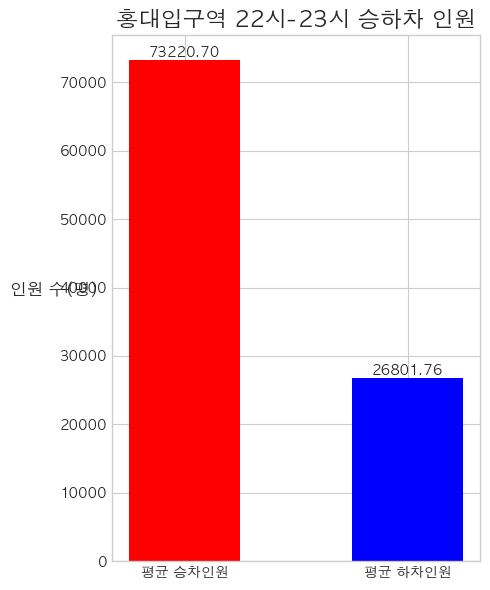

In [34]:
line = '경의중앙선'
station = '홍대입구역'
eta = '22시'

# get 
aggregation_getonoff = get_aggregation_getonoff(line=line, station=station, eta=eta)
print(aggregation_getonoff)

# plot
plot_aggregation_getonoff(aggregation_getonoff, station=station, eta=eta)

# 향후 필요한 개발사항

* '원할', '평균', '혼잡'의 기준을 정해야 함
* 지하철 역별로 유동인구 예측 모델 개발 및 학습
* 지하철 뿐만 아니라 버스에 대한 유동량 예측도 가능해야 함